
# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by ammunition merchants to determine whether a prospective buyer is eligible to buy firearms or explosives. Guns shops call into this system to ensure that each customer does not have a criminal record or isn't otherrwise ineligible to make a purchase. The data has been supplemented by state level data from census.gov.
>
> The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
>
> The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.


>#### Questions to Answer:
>1. Does Population estimates in States correlate with total gun registration and purchases?
>1. Is there relation between total gun registration and purchases and the percentage of various races in the given states?
>1. Which States had the highest growth in gun registration and purchases?
>1. What is the overall trend of gun purchases?

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=2)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_census = pd.read_csv('U.S. Census Data.csv')
df_guns = pd.read_excel("gun_data.xlsx")
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [10]:
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [11]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [6]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [7]:
# check for duplicate records in census data
df_census[df_census.duplicated()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#check for duplicate rows in gun_data
df_guns[df_guns.duplicated()]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals


#### Data Assesment
 ##### Quality Issues:
 
 `gun_data.xlsx` 
- month column data type is object instead of datetime
- state column data type is object instead of category
- missing data on the various columns depicting types of guns
- the various columns depicting types of guns have data types of float64 instead of int64


 ##### Tidiness Issues:

 `U.S. Census Data.csv`
- the structure of the U.S.Census Data is messy as data of different types are the same columns
    


### Data Cleaning

In [43]:
#change the data type of gun_data month column to datetime
df_guns['month'] = pd.to_datetime(df_guns['month'])
df_guns['month'].head()

0   2017-09-01
1   2017-09-01
2   2017-09-01
3   2017-09-01
4   2017-09-01
Name: month, dtype: datetime64[ns]

In [48]:
#fill in missing values with 0s
df_guns.fillna(0, inplace=True)
df_guns.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11-01,Virginia,0.0,0.0,14.0,2.0,0.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
12481,1998-11-01,Washington,1.0,0.0,65.0,286.0,0.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361
12482,1998-11-01,West Virginia,3.0,0.0,149.0,251.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408
12483,1998-11-01,Wisconsin,0.0,0.0,25.0,214.0,0.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241
12484,1998-11-01,Wyoming,8.0,0.0,45.0,49.0,0.0,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107


In [49]:
#change the data type of gun_data gun types columns to int64
int_cols = [col for col in df_guns.columns if col not in ['month', 'state']]

for col in int_cols:
    df_guns[col] = df_guns[col].astype('int64')
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  int64         
 3   permit_recheck             12485 non-null  int64         
 4   handgun                    12485 non-null  int64         
 5   long_gun                   12485 non-null  int64         
 6   other                      12485 non-null  int64         
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  int64         
 9   prepawn_handgun            12485 non-null  int64         
 10  prepawn_long_gun           12485 non-null  int64         
 11  prepawn_other              12485 non-null  int64         
 12  rede

In [51]:
#change the data type of gun_data state column to category
df_guns['state'] = df_guns['state'].astype('category')
df_guns['state'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12485 entries, 0 to 12484
Series name: state
Non-Null Count  Dtype   
--------------  -----   
12485 non-null  category
dtypes: category(1)
memory usage: 14.8 KB


In [15]:
#Remove the Fact Note column of U.S. Census Data
df_census.drop(axis=1, columns=['Fact Note'], inplace = True )
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [19]:
#Remove U.S. Census Data rows that are irrelevant to the analysis
df_census.drop(df_census.index[65:], axis=0, inplace=True)
df_census.tail()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [37]:
#Transpose U.S. Census Data table and change the header column
df_census2 = df_census.transpose()
df_census2.columns = df_census2.iloc[0]
df_census2 = df_census2.iloc[1:].reset_index()
#rename index column to State
df_census2.rename(columns = {'index':'State'}, inplace = True)
df_census2.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


<a id='eda'></a>
## Exploratory Data Analysis





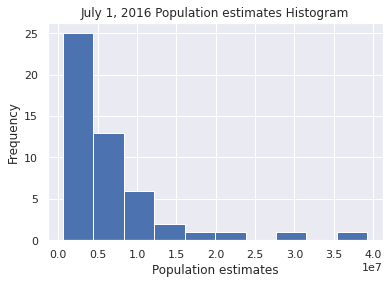

In [287]:
#plot a histogram to showcase the distribution of population estimates
plt.hist(data=df_census2, x='Population estimates, July 1, 2016,  (V2016)');
plt.title('July 1, 2016 Population estimates Histogram')
plt.xlabel('Population estimates')
plt.ylabel('Frequency');

- The distribution of July 1, 2016 Population estimates is right-skewed.

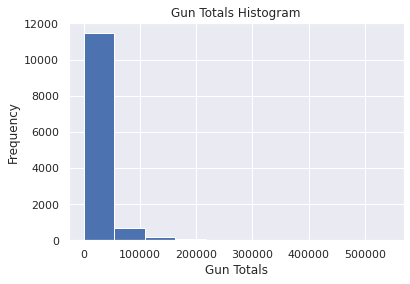

In [293]:
#plot a histogram to showcase the distribution of Gun totals
bins = np.arange(0, df_guns['totals'].max()+5, 50000)
plt.hist(data=df_guns, x='totals');
plt.title('Gun Totals Histogram')
plt.xlabel('Gun Totals')
plt.ylabel('Frequency');

- The distribution of Gun Totals is right-skewed.

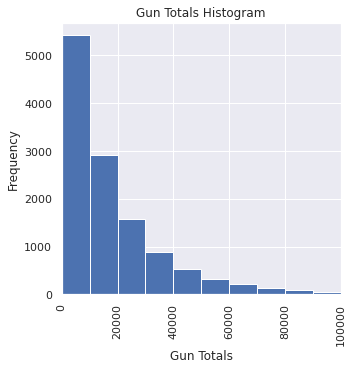

In [291]:
#plot a histogram to showcase the distribution of Gun totals using xlim 
plt.figure(figsize=(5,5))
bins = np.arange(0, df_guns['totals'].max()+5, 10000)
plt.hist(data=df_guns, x='totals', bins=bins);
plt.xlim(0, 100000)
plt.xticks(rotation=90);
plt.title('Gun Totals Histogram')
plt.xlabel('Gun Totals')
plt.ylabel('Frequency');

- Zooming in on the distribution of the gun totals depicts that majority of the data points are between 0 and 20,000

In [62]:
#compute summarry statistics of the totals column
df_guns[['totals']].describe()

,totals
count,12485.000000
mean,21595.725911
std,32591.418387
min,0.000000
25%,4638.000000
50%,12399.000000
75%,25453.000000
max,541978.000000


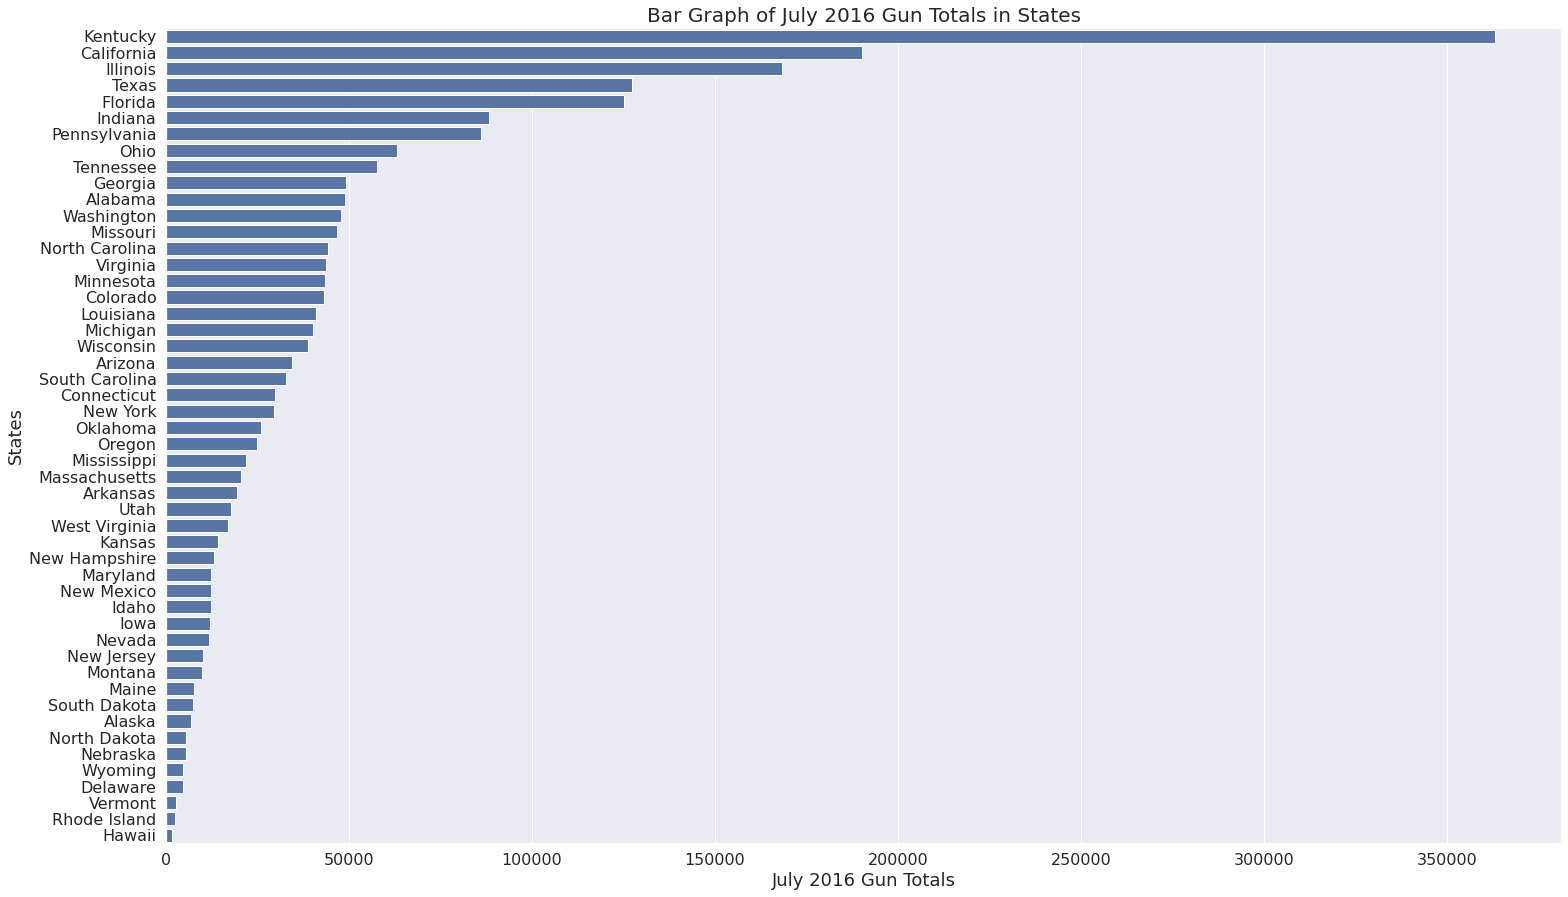

In [301]:
#plot a bar graph to showcase Gun totals in each State in July 2016
order = df_mergedJuly.sort_values('totals', ascending=False).state
plt.figure(figsize=(25,15))
base_color = sns.color_palette()[0]
sns.barplot(data=df_mergedJuly, x= 'totals', y='state', color=base_color, order=order)
plt.yticks(size=16)
plt.xticks(size=16)
plt.ylabel('States', size=18)
plt.xlabel('July 2016 Gun Totals', size=18)
plt.title('Bar Graph of July 2016 Gun Totals in States', size=20);

- The state of Kentucky had the by far the highest gun totals compared to other states followed by the states of Carlifonia, Illinois, Texas and Florida respectively.
- The states of Hawaii, Rhode Island, Vermont and Delaware had the lowest gun totals respectively.



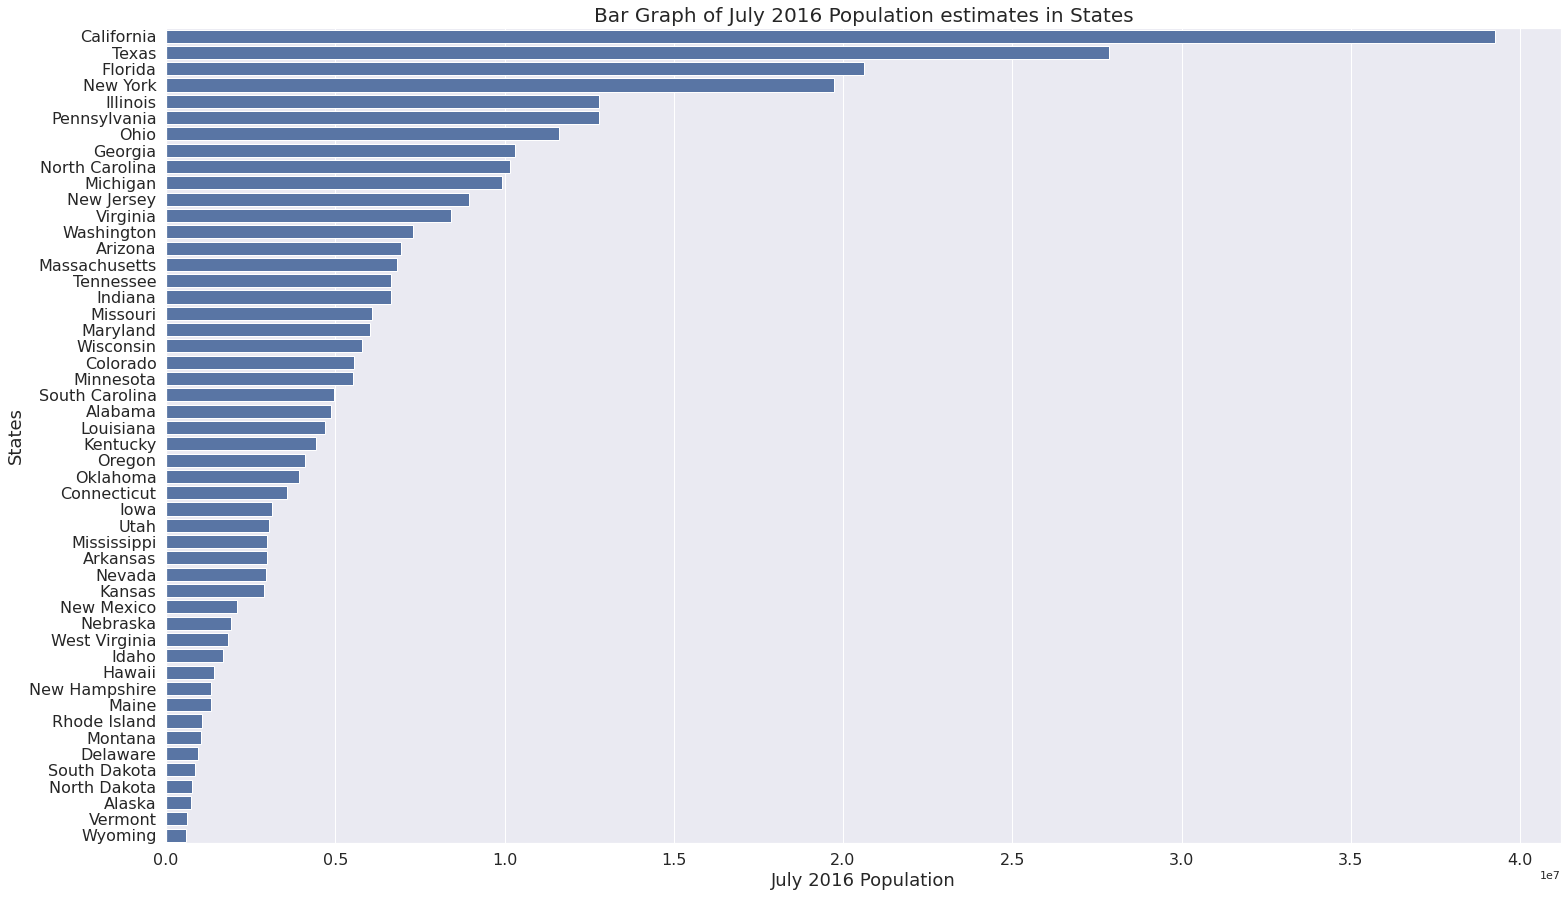

In [303]:
#plot a bar graph to showcase Population estimates in each State July 2016
order = df_mergedJuly.sort_values('Population estimates, July 1, 2016,  (V2016)', ascending=False).state
plt.figure(figsize=(25,15))
base_color = sns.color_palette()[0]
sns.barplot(data=df_mergedJuly, x= 'Population estimates, July 1, 2016,  (V2016)', y='state', color=base_color, order=order)
plt.ylabel('States', size=18)
plt.xlabel('July 2016 Population', size=18)
plt.yticks(size=16)
plt.xticks(size=16)
plt.title('Bar Graph of July 2016 Population estimates in States', size=20);

- The state of Carlifonia had the highest population estimates compared to other states followed by the states of Texas, Florida, New York and Illinois respectively.
- The states of Wyoming, Vermont, Alaska and North Dakota had the lowest population estimates respectively.

In [315]:
#Subset U.S Census Data to obtain population estimates and race data 
df_pop2016 = df_census2[['State', 'Population estimates, July 1, 2016,  (V2016)', 'White alone, percent, July 1, 2016,  (V2016)', 'Black or African American alone, percent, July 1, 2016,  (V2016)', 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)', 'Hispanic or Latino, percent, July 1, 2016,  (V2016)', 'Asian alone, percent, July 1, 2016,  (V2016)']]


In [266]:
#Takes a string that represents a percentage or a float value.
#if a string represents a percentage it removes the % sign else if it represents a float value it casts the string 
#to float and multiplies it by 100 and returns back a string
def remove_sign(stri):
    if stri.endswith('%'):
        return stri.replace('%', '')
    else:
        i=float(stri)*100
        return str(i)

In [ ]:
#Utilize the series "apply" function to apply the above "remove_sign" function over the race columns and then 
#change the data type of the columns to float64 using "astype" function
df_pop2016['White alone, percent, July 1, 2016,  (V2016)'] = df_pop2016['White alone, percent, July 1, 2016,  (V2016)'].apply(remove_sign).astype('float64')
df_pop2016['Black or African American alone, percent, July 1, 2016,  (V2016)'] = df_pop2016['Black or African American alone, percent, July 1, 2016,  (V2016)'].apply(remove_sign).astype('float64')
df_pop2016['American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)'] = df_pop2016['American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)'].apply(remove_sign).astype('float64')
df_pop2016['Hispanic or Latino, percent, July 1, 2016,  (V2016)'] = df_pop2016['Hispanic or Latino, percent, July 1, 2016,  (V2016)'].apply(remove_sign).astype('float64')
df_pop2016['Asian alone, percent, July 1, 2016,  (V2016)'] = df_pop2016['Asian alone, percent, July 1, 2016,  (V2016)'].apply(remove_sign).astype('float64')

In [319]:
#Showcase the effect of above changes
df_pop2016

Fact,State,"Population estimates, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)"
0,Alabama,4863300,69.30%,26.80%,0.70%,4.20%,1.40%
1,Alaska,741894,66.10%,3.80%,15.20%,7.00%,6.30%
2,Arizona,6931071,83.30%,4.90%,5.40%,30.90%,3.40%
3,Arkansas,2988248,79.40%,15.70%,1.00%,7.30%,1.60%
4,California,39250017,72.70%,6.50%,1.70%,38.90%,14.80%
5,Colorado,5540545,87.50%,4.50%,1.60%,21.30%,3.30%
6,Connecticut,3576452,80.60%,11.80%,0.50%,15.70%,4.70%
7,Delaware,952065,70.10%,22.60%,0.60%,9.20%,4.00%
8,Florida,20612439,77.60%,16.80%,0.50%,24.90%,2.90%
9,Georgia,10310371,61.20%,32.00%,0.50%,9.40%,4.10%


In [174]:
#Filter Gun data that only pertains to July 2016
df_gJuly = df_guns[df_guns['month']=='2016-07-01'][['month', 'state', 'totals']]

In [278]:
#Merge population data of july 2016 and gun data of july 2016
df_mergedJuly=pd.merge(df_gJuly, df_pop2016, left_on='state', right_on='State')

In [318]:
df_mergedJuly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   month                                                                     50 non-null     datetime64[ns]
 1   state                                                                     50 non-null     object        
 2   totals                                                                    50 non-null     int64         
 3   State                                                                     50 non-null     object        
 4   Population estimates, July 1, 2016,  (V2016)                              50 non-null     int64         
 5   Population estimates base, April 1, 2010,  (V2016)                        50 non-null     int64         
 6   White alone,

### Does Population in States correlate with total gun registration and purchases?

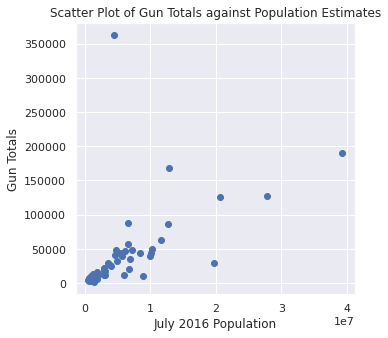

In [306]:
#plot a scatter plot of gun totals against population estimates
plt.figure(figsize=(5,5))
plt.scatter(data=df_mergedJuly, x='Population estimates, July 1, 2016,  (V2016)', y='totals')
plt.xlabel('July 2016 Population')
plt.ylabel('Gun Totals');
plt.title('Scatter Plot of Gun Totals against Population Estimates');

- The Scatter Plot of Gun Totals against Population Estimates depicts the existance of correlation between gun totals and population estimates variables although this doesn't hold true in several states, a key outlier being the state of Kentucky with relatively low population estimates but with the highest gun totals.

### Is there relation between total gun registration and purchases and the percentage of various races in the given states?

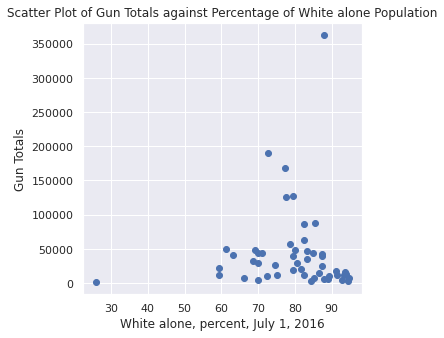

In [307]:
#plot a scatter plot of gun totals against percentage of white alone population
plt.figure(figsize=(5,5))
plt.scatter(data=df_mergedJuly, x='White alone, percent, July 1, 2016,  (V2016)', y='totals')
plt.xlabel('White alone, percent, July 1, 2016')
plt.ylabel('Gun Totals');
plt.title('Scatter Plot of Gun Totals against Percentage of White alone Population');

- The Scatter Plot of Gun Totals against Percentage of White alone Population depicts that there's no correlation between the gun totals and the population percentage of white alone variables.

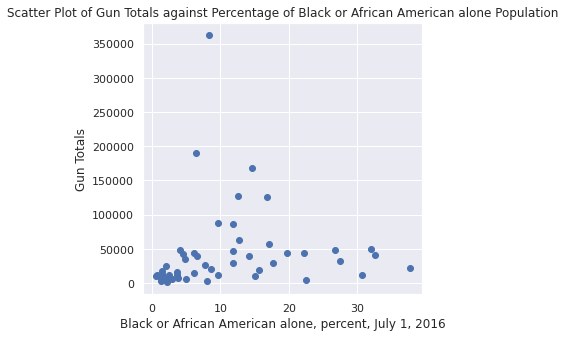

In [308]:
#plot a scatter plot of gun totals against percentage of black or african american alone population
plt.figure(figsize=(5,5))
plt.scatter(data=df_mergedJuly, x='Black or African American alone, percent, July 1, 2016,  (V2016)', y='totals')
plt.xlabel('Black or African American alone, percent, July 1, 2016')
plt.ylabel('Gun Totals');
plt.title('Scatter Plot of Gun Totals against Percentage of Black or African American alone Population');

- The Scatter Plot of Gun Totals against Percentage of Black or African American alone Population depicts that there's no correlation between the gun totals and the population percentage of Black or African American alone variables.


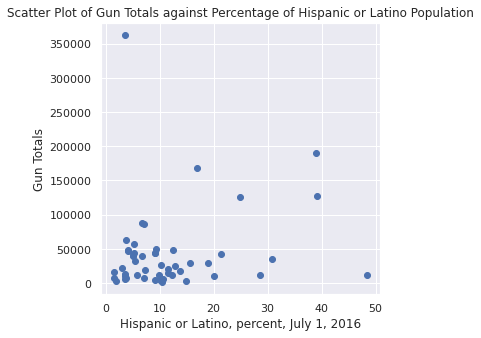

In [309]:
#plot a scatter plot of gun totals against percentage of hispanic or latino alone population
plt.figure(figsize=(5,5))
plt.scatter(data=df_mergedJuly, x='Hispanic or Latino, percent, July 1, 2016,  (V2016)', y='totals')
plt.xlabel('Hispanic or Latino, percent, July 1, 2016')
plt.ylabel('Gun Totals');
plt.title('Scatter Plot of Gun Totals against Percentage of Hispanic or Latino Population');

- The Scatter Plot of Gun Totals against Percentage of Hispanic or Latino Population depicts that there's no correlation between the gun totals and the population percentage of Hispanic or Latino variables.


### Which state has had the highest growth in gun registrations?

<Figure size 3600x3600 with 0 Axes>

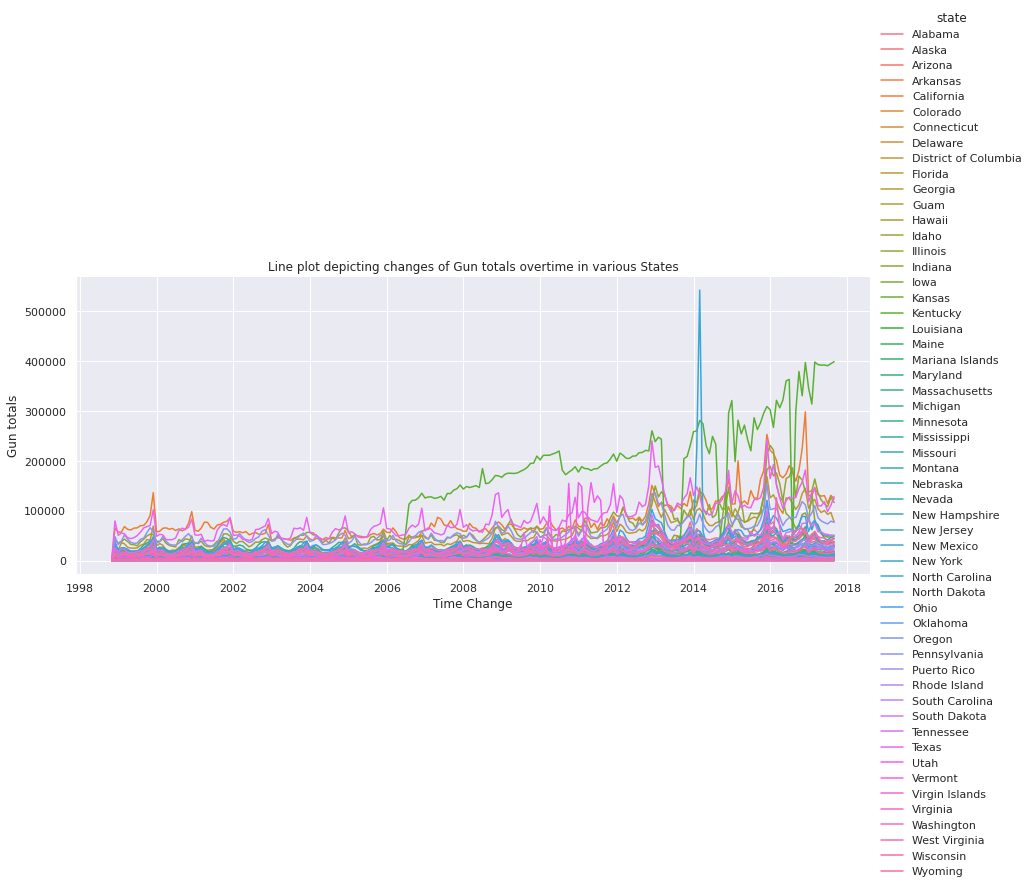

In [313]:
#plot a line plot showcasing changes of Gun totals overtime in various States
plt.figure(figsize=(50,50))
sns.relplot(kind='line', data=df_guns[['month', 'state', 'totals']], x='month', y='totals', hue='state', aspect=2.5)
plt.ylabel('Gun totals')
plt.xlabel('Time Change')
plt.title('Line plot depicting changes of Gun totals overtime in various States')
plt.show();

- The state of Kentucky has had the highest consistent gun purchases and registrations followed by the state of Carlifonia. The state of North Carolina experienced a momentary peak in march 2014 which overally was the highest but then plummated in the consequent periods.

In [76]:
#view the highest 30 totals including state and month 
df_guns.sort_values(by='totals', ascending=False)[['month', 'state', 'totals']].head(30)

,month,state,totals
2345,2014-03-01,North Carolina,541978
18,2017-09-01,Kentucky,398706
348,2017-03-01,Kentucky,397959
513,2016-12-01,Kentucky,397059
73,2017-08-01,Kentucky,394718
293,2017-04-01,Kentucky,392685
183,2017-06-01,Kentucky,392002
238,2017-05-01,Kentucky,391740
128,2017-07-01,Kentucky,390494
623,2016-10-01,Kentucky,378973


### What is the overall trend of gun purchases?

In [85]:
#subset the df_guns dataframe and aggregate based on the month column
df_trend = df_guns[['month', 'totals']].groupby(['month']).sum()

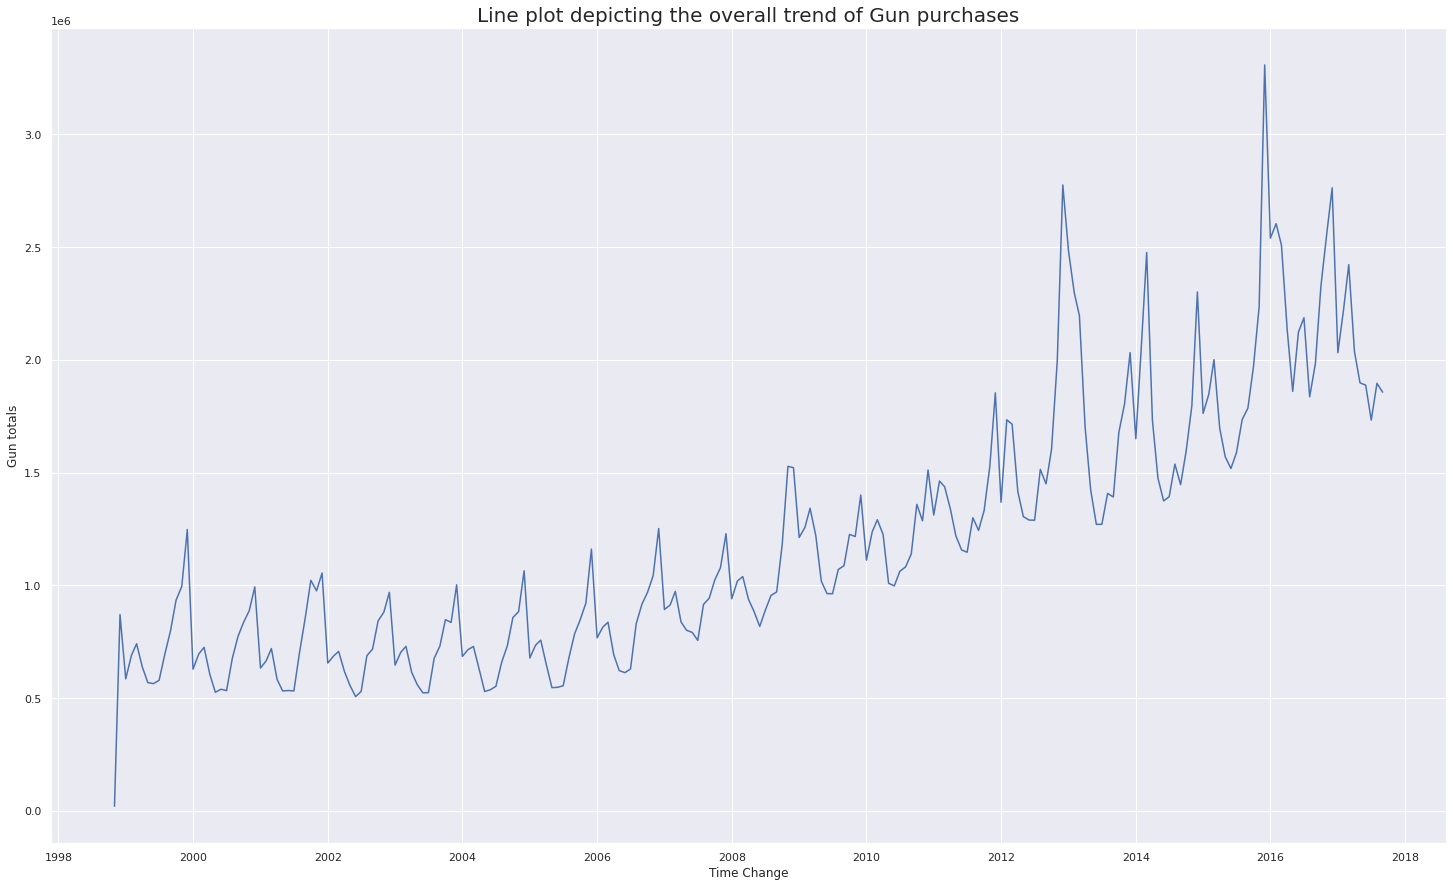

In [314]:
#plot a line plot to showcase the overall trend of gun purchases
plt.figure(figsize=(25,15))
sns.lineplot(data=df_trend, x="month", y="totals")
plt.ylabel('Gun totals')
plt.xlabel('Time Change')
plt.title('Line plot depicting the overall trend of Gun purchases', size=20)
plt.show();

- The overall trend in gun purchases is an upward/increasing trend as indicated by higher highs and higher lows when the totals gun_data figures are plotted against month time data in a time plot.

<a id='conclusions'></a>
## Conclusions

> **Results**: The data suggests that
> 1. There exists correlation between gun totals and population estimates variables although this doesn't hold true in several states, a key outlier being the state of Kentucky with relatively low population estimates but with the highest gun totals.
> 1. There is no correlation between total gun registration and purchases and the percentage of various races in the given states.
> 1. The state of Kentucky has had the highest consistent gun purchases and registrations followed by the state of Carlifonia. The state of North Carolina experienced a momentary peak in march 2014 which overally was the highest but then plummated in the consequent periods.
> 1. The overall trend in gun purchases is an upward/increasing trend as indicated by higher highs and higher lows when the totals gun_data figures are plotted against month time data in a time plot.

> **Limitations**: 
> 1. The gun_data available had misssing data on various types of gun registrations and purchases.
> 1. The U.S. Census Data has most variables with just one data point per state for 2016, but only a few have data for more than one year.

##### General Resources
- Python for Data Analysis by Wes McKinney
- Data Wrangling with Python Tips and Tools to Make Your Life Easier by Jacqueline Kazil, Katharine Jarmul.